# 📽️ Netflix Data Cleaning Project

This project demonstrates a step-by-step data cleaning process on a Netflix dataset using Python and pandas. It is designed as a portfolio-ready case study for aspiring data analysts.The goal is to prepare the dataset for further analysis by identifying and handling missing values, correcting data types, and ensuring consistency across key fields

## 📌 Project Objectives

- Understand the structure of raw Netflix data.
- Identify and handle missing or inconsistent data.
- Prepare a clean dataset for analysis or visualization.

### 🧰 Tools:

Python

Pandas

Google Colab

GitHub for hosting



## 📂 Dataset Overview

The dataset contains information about movies and TV shows available on Netflix. Key columns include:

- `show_id`: Unique identifier
- `type`: Movie or TV Show
- `title`, `director`, `cast`
- `country`, `date_added`, `release_year`
- `rating`, `duration`, `genre`

We will walk through cleaning operations necessary to prepare this dataset for analysis.

## 🧹 Data Cleaning Process

We'll follow this general plan:

1. Inspect dataset and data types
2. Handle missing values
3. Fix data formatting issues
4. Remove duplicates (if any)
5. Final dataset check

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Netflix_Raw_Dataset.csv')
print("Veri seti başarıyla yüklendi!")

Veri seti başarıyla yüklendi!


**Data Exploration**
Let's have a look at the data using df.head()

In [ ]:
 #Yapıyı anlamak için ilk birkaç satırı göster

print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# Eksik değerleri say
missing_values = data.isnull().sum()

# Eksik değerlerin yüzdesi
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Görsel olarak tablo halinde birleştir
missing_data = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Yüzde (%)': missing_percentage.round(2)
}).sort_values(by='Eksik Değer Sayısı', ascending=False)

print(missing_data)

              Eksik Değer Sayısı  Yüzde (%)
director                    2634      29.91
country                      831       9.44
cast                         825       9.37
date_added                    10       0.11
rating                         4       0.05
duration                       3       0.03
show_id                        0       0.00
type                           0       0.00
title                          0       0.00
release_year                   0       0.00
listed_in                      0       0.00
description                    0       0.00


In [ ]:
# Veri seti hakkında temel bilgileri göster

data.info()
print("\nVeri Seti Bilgisi:")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Veri Seti Bilgisi:


**step 2: check for null values**


In [ ]:
# Veri seti hakkında temel bilgileri göster
print("\nVeri Seti Bilgisi:")
data.info()


Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
(data.isnull().sum() / len(data)) * 100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
data.isnull().values.any()
#Bu ifade True dönerse eksik değer var, False dönerse yok demektir.



np.True_

In [ ]:
data[data.isnull().any(axis=1)].shape[0]
#eksik değer içeren satır sayısı

3475

In [ ]:
 data['show_id'].isnull().sum()
 data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
 # 1. 'director', 'cast', 'country' sütunlarını 'Unknown' olarak doldur
data['director'] = data['director'].fillna('Unspecified')
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['duration']= data['duration'].fillna(data['duration'].mode()[0])

In [ ]:
# 'rating' sütunun analizi
#    'rating' içerik analizi için çok önemlidir. Eğer sadece birkaç tane eksikse,
#    mod ile (en sık görülen derecelendirme) doldurabiliriz veya düşürebiliriz.
#    İlk olarak, hangi derecelendirmelerin mevcut olduğunu görmek için benzersiz değerlerini kontrol edelim.
print("\n'rating' içindeki benzersiz değerler (eksikleri ele almadan önce):")
print(data['rating'].unique())

# 'rating' sütununda eksik değer varsa, modu ile dolduralım.
if data['rating'].isnull().any(): # .any() ile daha performanslı kontrol
    mode_rating = data['rating'].mode()[0]
    data['rating'] = data['rating'].fillna(mode_rating)

#eksik değerleri ele aldıktan sonra:
print("\nEksik değerler (ele aldıktan sonra):")
print(data.isnull().sum())
print(f"Eksik değerleri ele aldıktan sonraki boyut: {data.shape}")


'rating' içindeki benzersiz değerler (eksikleri ele almadan önce):
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Eksik değerler (ele aldıktan sonra):
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Eksik değerleri ele aldıktan sonraki boyut: (8807, 12)


In [ ]:
#Remove the "s" character from the show_id column
data['show_id'] = data['show_id'].str.replace('s', '')

**Temizlik Sonrası Kontrol**

In [ ]:
# Temizlik sonrası eksik değer kontrolü
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unspecified,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Adım 3: Veri Tiplerini Düzeltme

In [ ]:
print("\nVeri tipleri (düzeltmeden önce):")
print(data.dtypes)


Veri tipleri (düzeltmeden önce):
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


📅 1. date_added Sütunu


In [ ]:
# Pandas ile datetime formatına çevir
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
# Dönüşümden sonra NaT değerleri oluştu mu kontrol et (bu orijinal veri sorunları anlamına gelir)
if data['date_added'].isnull().any():
    print(f"Uyarı: {data['date_added'].isnull().sum()} 'date_added' girişi ayrıştırılamadı ve NaT oldu. Bu satırlar düşürülüyor.")
    data.dropna(subset=['date_added'], inplace=True)

Uyarı: 88 'date_added' girişi ayrıştırılamadı ve NaT oldu. Bu satırlar düşürülüyor.


2.relase_year Sütunu


In [ ]:
data['release_year']

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
8802,2007
8803,2018
8804,2009
8805,2006


<Axes: xlabel='release_year'>

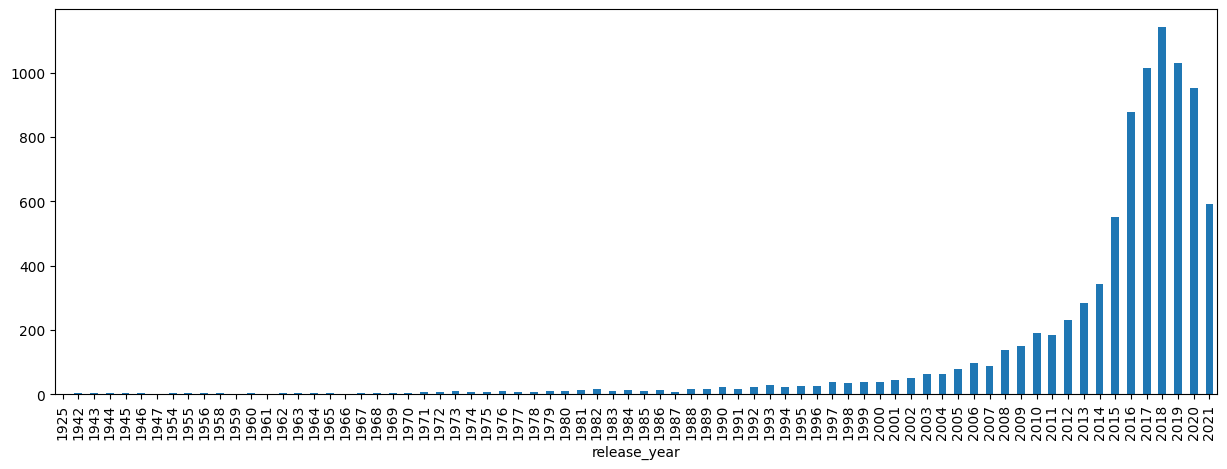

In [ ]:
# İçeriklerin yıllara göre dağılımı
data['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))


⏱️ 3. duration Sütunu

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data['duration'] #kaç tip bilgi içerdiğini kontrol etmek için bakıyoruz
#2 tip 90 min ve 2 season gibi bilgi içerdiğini görüyoruz

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
...,...
8802,158 min
8803,2 Seasons
8804,88 min
8805,88 min


In [ ]:
print("\n'type' içindeki benzersiz değerler:", data['type'].unique())


'type' içindeki benzersiz değerler: ['Movie' 'TV Show']


In [ ]:
# 'duration' sütunundaki sayısal değeri ayıklama
# RegEx kullanarak daha sağlam bir çıkarma yapalım
data['duration_value'] = data['duration'].str.extract(r'(\d+)\s*(?:min|Season(?:s)?)?').astype(float)
# Not: Yukarıdaki Regex sadece ilk yakalama grubunu döndürecektir (yani sayıyı).

print("\nYeni 'duration_value' sütunuyla ilk 5 satır:")
print(data[['duration', 'duration_value', 'type']].head())


Yeni 'duration_value' sütunuyla ilk 5 satır:
    duration  duration_value     type
0     90 min            90.0    Movie
1  2 Seasons             2.0  TV Show
2   1 Season             1.0  TV Show
3   1 Season             1.0  TV Show
4  2 Seasons             2.0  TV Show


In [ ]:
# Temizleme ve ayırma

#Sayı ve birim olarak ayır

data[['duration_int', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\D+)')
data['duration_int'] = data['duration_int'].astype(float)
data['duration_unit'] = data['duration_unit'].astype('category')


In [ ]:
# veri tiplerinin son durmunu kontrol edelim
print("\nVeri tipleri (düzeltmeden sonra):")
print(data.dtypes)
print("\nYeni 'duration_value' sütunuyla ilk 5 satır:")
print(data[['duration', 'duration_value', 'type']].head())


Veri tipleri (düzeltmeden sonra):
show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
duration_value           float64
duration_int             float64
duration_unit           category
dtype: object

Yeni 'duration_value' sütunuyla ilk 5 satır:
    duration  duration_value     type
0     90 min            90.0    Movie
1  2 Seasons             2.0  TV Show
2   1 Season             1.0  TV Show
3   1 Season             1.0  TV Show
4  2 Seasons             2.0  TV Show


In [ ]:
data.info()
#8709 veri olduğunu ve director, cast, country columlarında oldukça çok veri eksiği olduğu görüldü

<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8719 non-null   object        
 1   type            8719 non-null   object        
 2   title           8719 non-null   object        
 3   director        8719 non-null   object        
 4   cast            8719 non-null   object        
 5   country         8719 non-null   object        
 6   date_added      8719 non-null   datetime64[ns]
 7   release_year    8719 non-null   int64         
 8   rating          8719 non-null   object        
 9   duration        8719 non-null   object        
 10  listed_in       8719 non-null   object        
 11  description     8719 non-null   object        
 12  duration_value  8719 non-null   float64       
 13  duration_int    8719 non-null   float64       
 14  duration_unit   8719 non-null   category      
dtypes: catego

In [ ]:
print(data.isnull().sum())
#0 değeri, bu sütunda hiçbir NaN değer olmadığını açıkça gösterir.
#Bu, df.info()'ya göre daha sayısal ve net bir kontrol yöntemidir.

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_value    0
duration_int      0
duration_unit     0
dtype: int64


Dolayısıyla, release_year için astype(int) yaparken ek bir dropna veya fillna adımına gerek kalmaz çünkü zaten NaN değeri yoktur. Kontrol etmek için yukarıdaki yöntemlerden herhangi birini kullanmak yeterlidir. Genellikle df.isnull().sum() veya df.info() başlangıçtaki kontrol için en pratik yöntemlerdir.


# 🗓️  Yinelenenleri Kaldırma

# 🎯 Amaç
Veri kümesinde birden fazla kez geçen tamamen aynı satırları tespit edip temizlemek.

# 🔍 1. Yinelenen Satırları Bul

In [ ]:
# Yinelenmiş satırları kontrol et
duplicate_rows = data[data.duplicated()]
print("Yinelenen satır sayısı:", duplicate_rows.shape[0])



Yinelenen satır sayısı: 0


In [ ]:
# İlk 5 yinelenmiş satırı göster
print(duplicate_rows.head())

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, duration_value, duration_int, duration_unit]
Index: []


# 🧹 2. Yinelenen Satırları Sil

In [ ]:
# Yinelenen satırları kaldır
data.drop_duplicates(inplace=True)

# Kalan satır sayısını kontrol et
print("Temizlendikten sonra satır sayısı:", data.shape[0])

Temizlendikten sonra satır sayısı: 8719


# 🧪  Kolonları Formatlama ve Dönüştürme

---

\

# 🔧 1. date_added Sütununu Dönüştür

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_value', 'duration_int', 'duration_unit'],
      dtype='object')

In [ ]:
# 'date_added' kolonunu datetime formatına çevir
data['date_added'] = pd.to_datetime(data['date_added'])


In [ ]:
# Yeni sütunlar: yıl ve ay
data['added_year'] = data['date_added'].dt.year
data['added_month'] = data['date_added'].dt.month

print("\n'date_added', 'added_year', ve 'added_month' sütunlarıyla ilk 5 satır:")
print(data[['date_added', 'added_year', 'added_month']].head())


'date_added', 'added_year', ve 'added_month' sütunlarıyla ilk 5 satır:
  date_added  added_year  added_month
0 2021-09-25        2021            9
1 2021-09-24        2021            9
2 2021-09-24        2021            9
3 2021-09-24        2021            9
4 2021-09-24        2021            9


In [ ]:
data['date_added'] #kontrol etmek için baktım

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


# 🔧 2. duration Sütununu Ayır

⏱️ 7. Süre Bilgisini Ayırmak: duration

In [ ]:
# 'duration' sütununu süre ve birim olarak ayır
data[['duration_int', 'duration_unit']] = data['duration'].str.extract('(\d+)\s*(\D+)')
data['duration_int'] = data['duration_int'].astype(float)


In [ ]:
data['duration_int'] #kontrol edildi

,duration_int
0,90.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
8802,158.0
8803,2.0
8804,88.0
8805,88.0


In [ ]:
print(f"\nKaldırmadan önceki yinelenen satır sayısı: {data.duplicated().sum()}")

# Yinelenen satırları kaldır
data.drop_duplicates(inplace=True)

print(f"Kaldırdıktan sonraki yinelenen satır sayısı: {data.duplicated().sum()}")
print(f"Yinelenenleri kaldırdıktan sonraki boyut: {data.shape}")


Kaldırmadan önceki yinelenen satır sayısı: 0
Kaldırdıktan sonraki yinelenen satır sayısı: 0
Yinelenenleri kaldırdıktan sonraki boyut: (8719, 17)


In [1]:
🆔 9. show_id Kontrolü (Eksik veya Benzersiz mi?)

SyntaxError: invalid character '🆔' (U+1F194) (ipython-input-1-1111685457.py, line 1)

In [ ]:
print("NaN (eksik) değer sayısı:", data['show_id'].isnull().sum())
print("Boş (string) değer sayısı:", (data['show_id'].astype(str).str.strip() == '').sum())
print("Benzersiz ID sayısı:", data['show_id'].nunique(), "/", len(data))

NaN (eksik) değer sayısı: 0
Boş (string) değer sayısı: 0
Benzersiz ID sayısı: 8719 / 8719


✅ 10. Temizlikten Sonra Genel Durum

In [ ]:
print(data.info())
print(data.isnull().sum())  # Tüm eksik değerler temizlendi mi kontrol

<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8719 non-null   object        
 1   type            8719 non-null   object        
 2   title           8719 non-null   object        
 3   director        8719 non-null   object        
 4   cast            8719 non-null   object        
 5   country         8719 non-null   object        
 6   date_added      8719 non-null   datetime64[ns]
 7   release_year    8719 non-null   int64         
 8   rating          8719 non-null   object        
 9   duration        8719 non-null   object        
 10  listed_in       8719 non-null   object        
 11  description     8719 non-null   object        
 12  duration_value  8719 non-null   float64       
 13  duration_int    8719 non-null   float64       
 14  duration_unit   8719 non-null   object        
 15  added_yea

✅ Temizlenmiş Veriyi CSV Olarak Kaydet

In [ ]:
data.to_csv("Netflix_Cleaned_Dataset.csv", index=False)

## ✅ Conclusion

The Netflix dataset has been successfully cleaned and is now ready for exploration or visualization. This project demonstrates how to:

- Investigate missing or inconsistent values
- Apply practical data wrangling techniques
- Document cleaning steps clearly

## 🚀 Next Steps

- Perform exploratory data analysis (EDA)
- Visualize content trends by year, country, or genre
- Build dashboards using Tableau or Looker Studio